<a href="https://colab.research.google.com/github/allexov/allexov/blob/main/homework09_11_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Описание задачи

Спрогнозировать стоимость бриллианта в зависимости от его характеристик

## 1. Чтение данных

In [19]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving DiamondsPrices.csv to DiamondsPrices.csv


In [78]:
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['DiamondsPrices.csv']))
data_raw.shape

(53943, 11)

Датасет содержит информацию о 53943 бриллиантах.  Для каждого бриллианта указаны его вес в карат, огранка, цвет, чистота, глубина, площадка (верхняя часть бриллианта), цена (в долларах), X (длина), Y (ширина), Z (глубина)

In [79]:
data_raw

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Удалим столбец "Unnamed: 0"

In [80]:
data_raw.drop('Unnamed: 0', axis=1, inplace=True)
data_raw

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Типы признаков:

In [81]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Имена признаков:

* carat - вес в каратах
* cut - огранка (Fair, Good, Very Good, Premium, Ideal)
* color - цвет (J, I, H, G, F, E, D​)
* clarity - чистота (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF​)
* depth - глубина
* table - площадка (корона)
* price - цена (в долларах)
* x - длина
* y - ширина
* z - глубина
Признаки cut, color, clarity - номинальные (категориальные), остальные признаки (включая целевой признак price) - количественный (числовой)

Требуется предсказать количественный признак Price по остальным признакам. Это задача восстановления регрессии.

Заменим тип столбцов 'cut', 'color', 'clarity', которые имеют тип 'Object' на специальный, предназначенный для хранения категориальных значений:

In [82]:
data_raw['cut'] = data_raw['cut'].astype('category')
data_raw['color'] = data_raw['color'].astype('category')
data_raw['clarity'] = data_raw['clarity'].astype('category')

In [83]:
data_raw['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], ordered=False)

In [84]:
data_raw['color'].dtype

CategoricalDtype(categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False)

In [85]:
data_raw['clarity'].dtype

CategoricalDtype(categories=['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], ordered=False)

##2. Визуализация данных


Выведем сводную информацию о признаках

In [86]:
data_raw.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [87]:
data_raw.describe(include=['category'])

,cut,color,clarity
count,53943,53943,53943
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13067


### Некоторые выводы:
* Цена на бриллианты варьируется от 326 до 18823 долларов
* Средний вес бриллианта - 0.7 карат
* Большинство бриллиантов имеет идеальную оградку




*Цена* бриллианта в первую очередь зависит от его веса. Построим диаграмму рассеивания для двух признаков: carate и price

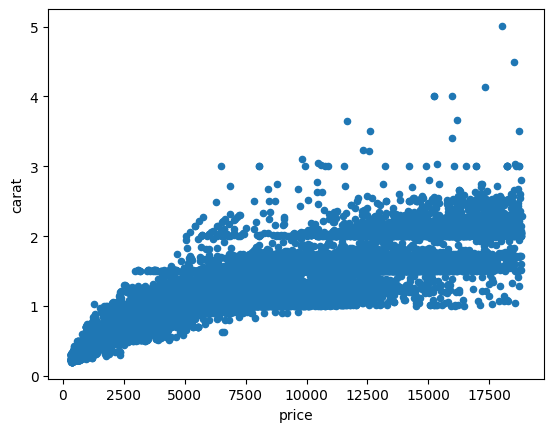

In [88]:
data_raw.plot(kind='scatter', x='price', y='carat')
pass

Все диаграммы рассеивания:

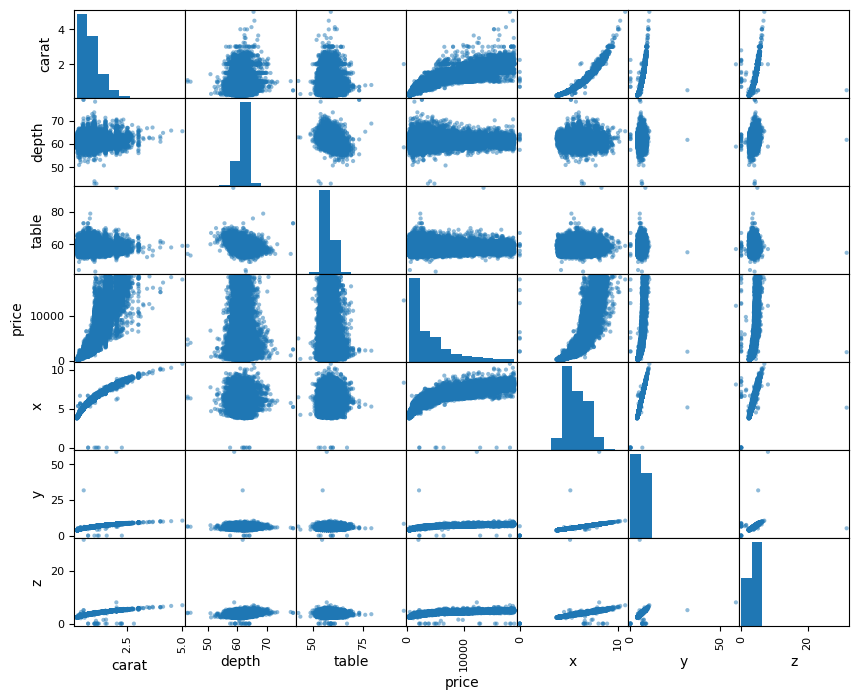

In [ ]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

Для обнаружения выбросов построим квантили для признака carat

---


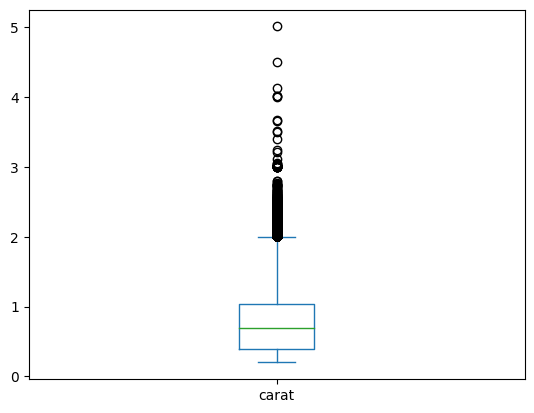

In [89]:
data_raw['carat'].plot(kind='box')
pass

In [90]:
data_raw['carat'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.23
0.010    0.24
0.050    0.30
0.100    0.31
0.500    0.70
0.900    1.51
0.950    1.70
0.990    2.18
0.995    2.31
Name: carat, dtype: float64

Воспользуемся эвристическим правилом для обнаружения выбросов. Удалим их

In [91]:
Q1, Q3 = data_raw['carat'].quantile([.25, .75])
IQR = Q3 - Q1
carat_lower = Q1 - 1.5*IQR
carat_upper = Q3 + 1.5*IQR

In [92]:
rows_to_drop = data_raw[
    (data_raw['carat'] < carat_lower) | (data_raw['carat'] > carat_upper)].index
data = data_raw.drop(rows_to_drop)
data.shape

(52054, 10)

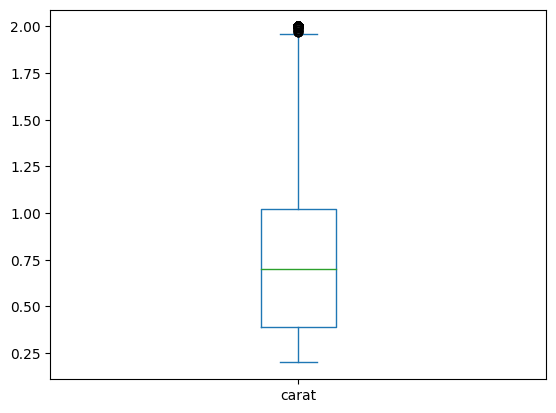

In [93]:
data['carat'].plot(kind='box')
pass

Для получения информации о характере распределения построим "ящик с усами" для пар "цена" - "чистота" и "огранка" - "цвет"

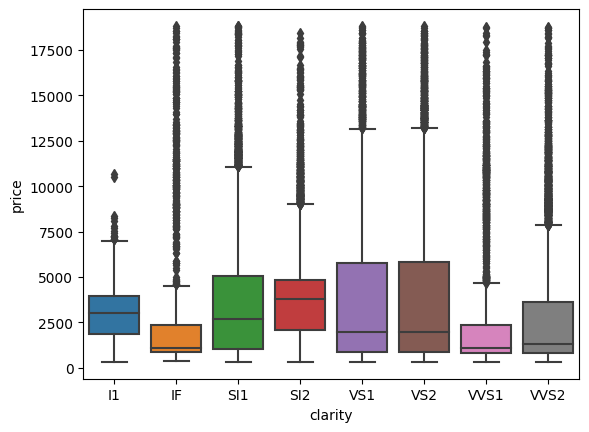

In [94]:
sns.boxplot(x="clarity", y="price", data=data)
pass

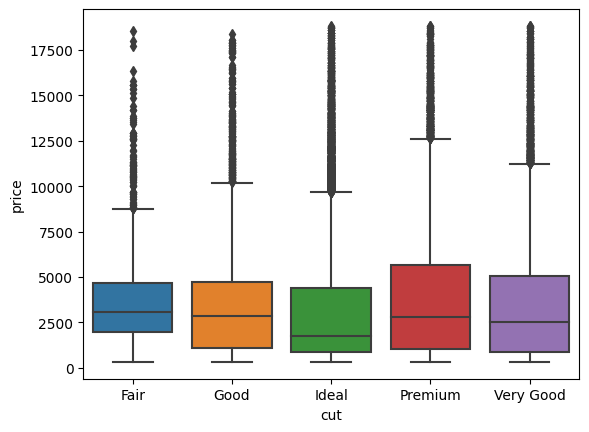

In [95]:
sns.boxplot(x="cut", y="price", data=data)
pass

Построим корреляционную матрицу

In [96]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.030195,0.174979,0.905118,0.981412,0.953260,0.958384
depth,0.030195,1.000000,-0.293888,-0.007627,-0.026319,-0.030534,0.100219
table,0.174979,-0.293888,1.000000,0.109026,0.185713,0.172719,0.139041
price,0.905118,-0.007627,0.109026,1.000000,0.867967,0.845488,0.844756
x,0.981412,-0.026319,0.185713,0.867967,1.000000,0.969231,0.968370
y,0.953260,-0.030534,0.172719,0.845488,0.969231,1.000000,0.945572
z,0.958384,0.100219,0.139041,0.844756,0.968370,0.945572,1.000000


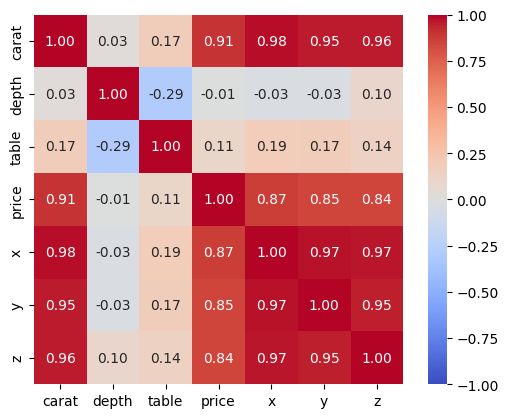

In [97]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Наибольшее влияние на цену бриллианта после его веса оказывают его размеры - длина и ширина, а вот корреляция между ценой и размером короны (лицевой части бриллианта) мала

##3. Пропущенные значения

In [98]:
data_raw.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропущенных значений нет

### 4-7. Обработка категориальных признаков, нормализация, разбиение на обучающую и тестовую выборку
Применим к категориальным признакам метод бинаризации



In [99]:
X = data_raw.drop(['price'], axis=1)
y = data_raw['price']

Разобьем на обучающую и тестовую выборку

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(40457, 13486)

In [101]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['cut', 'color', 'clarity']])

OneHotEncoder(drop='if_binary', sparse_output=False)

Применим метод бинаризации к категориальным признакам

In [102]:
dummies = pd.DataFrame(enc.transform(X_train[['cut', 'color','clarity']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
45416,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6957,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9163,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Добавим эти dummy-столбцы к таблице и удалим столбцы 'cut', 'color', 'clarity'

In [103]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['cut', 'color', 'clarity'], axis=1)
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
45416,0.55,60.7,57.0,5.30,5.27,3.21,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6957,1.05,61.1,58.0,6.56,6.51,3.99,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9163,1.02,60.7,56.0,6.53,6.50,3.95,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50732,0.75,59.1,58.0,5.91,5.87,3.48,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17933,1.16,61.7,57.0,6.80,6.72,4.17,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Выполним стандартизацию всех признаков:

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [105]:
X_train.describe()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,...,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04,4.045700e+04
mean,-3.530145e-17,6.694631e-15,-2.618279e-15,-3.280752e-16,-7.049753e-16,5.621888e-16,9.483973e-18,-9.835231e-18,1.067825e-16,-9.975734e-17,...,-4.917615e-17,5.971390e-17,3.512582e-19,-6.533403e-17,-2.897881e-17,-1.088901e-17,-2.212927e-17,-3.301827e-17,6.322648e-18,4.671735e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.259050e+00,-1.310375e+01,-6.493346e+00,-5.098273e+00,-4.970870e+00,-5.075621e+00,-1.755110e-01,-3.158063e-01,-8.154122e-01,-5.860559e-01,...,-3.334844e-01,-2.349819e-01,-1.168548e-01,-1.850843e-01,-5.697674e-01,-4.497250e-01,-4.221770e-01,-5.418768e-01,-2.690546e-01,-3.227627e-01
25%,-8.391539e-01,-5.180751e-01,-6.561191e-01,-9.110565e-01,-8.824830e-01,-9.030461e-01,-1.755110e-01,-3.158063e-01,-8.154122e-01,-5.860559e-01,...,-3.334844e-01,-2.349819e-01,-1.168548e-01,-1.850843e-01,-5.697674e-01,-4.497250e-01,-4.221770e-01,-5.418768e-01,-2.690546e-01,-3.227627e-01
50%,-2.093101e-01,4.128825e-02,-2.071016e-01,-3.094083e-02,-2.496105e-02,-1.404387e-02,-1.755110e-01,-3.158063e-01,-8.154122e-01,-5.860559e-01,...,-3.334844e-01,-2.349819e-01,-1.168548e-01,-1.850843e-01,-5.697674e-01,-4.497250e-01,-4.221770e-01,-5.418768e-01,-2.690546e-01,-3.227627e-01
75%,5.255076e-01,5.307312e-01,6.909333e-01,7.247140e-01,6.939715e-01,7.172322e-01,-1.755110e-01,-3.158063e-01,1.226374e+00,1.706322e+00,...,-3.334844e-01,-2.349819e-01,-1.168548e-01,-1.850843e-01,-5.697674e-01,-4.497250e-01,-4.221770e-01,-5.418768e-01,-2.690546e-01,-3.227627e-01
max,7.768711e+00,1.206760e+01,9.671283e+00,3.996255e+00,4.604735e+01,6.481408e+00,5.697648e+00,3.166498e+00,1.226374e+00,1.706322e+00,...,2.998641e+00,4.255647e+00,8.557630e+00,5.402943e+00,1.755102e+00,2.223581e+00,2.368675e+00,1.845438e+00,3.716717e+00,3.098251e+00


Обучаем модель

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_train_predict = model.predict(X_train)

In [108]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(1302740.124271484, 1141.3764165565556)

Тестируем модель

In [109]:
# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['cut', 'color','clarity']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['cut', 'color','clarity'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [110]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1302740.124271484, 1200564.245582126, 0.9189327339650293, 0.9222626557747928)

In [112]:
model.score(X_train, y_train)

0.9189327339650293

In [113]:

MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(1302740.124271484, 1200564.245582126)

In [114]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(1141.3764165565556, 1095.7026264375413)

In [115]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [116]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.918933,0.922263


##8 Метод  k  ближайших соседей, подбор параметра


In [118]:
from sklearn.neighbors import KNeighborsRegressor

model_p7 = KNeighborsRegressor(n_neighbors=7)
model_p6 = KNeighborsRegressor(n_neighbors=6)
model_p5 = KNeighborsRegressor(n_neighbors=5)
model_p4 = KNeighborsRegressor(n_neighbors=4)
model_p3 = KNeighborsRegressor(n_neighbors=3)
model_p2 = KNeighborsRegressor(n_neighbors=2)
model_p1 = KNeighborsRegressor(n_neighbors=1)

model_p7.fit(X_train, y_train)
model_p6.fit(X_train, y_train)
model_p5.fit(X_train, y_train)
model_p4.fit(X_train, y_train)
model_p3.fit(X_train, y_train)
model_p2.fit(X_train, y_train)
model_p1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [119]:
y_train_predict_p7 = model_p7.predict(X_train)
y_test_predict_p7  = model_p7.predict(X_test)

y_train_predict_p6 = model_p6.predict(X_train)
y_test_predict_p6  = model_p6.predict(X_test)

y_train_predict_p5 = model_p5.predict(X_train)
y_test_predict_p5  = model_p5.predict(X_test)

y_train_predict_p4 = model_p4.predict(X_train)
y_test_predict_p4  = model_p4.predict(X_test)

y_train_predict_p3 = model_p3.predict(X_train)
y_test_predict_p3  = model_p3.predict(X_test)

In [120]:
y_train_predict_p2 = model_p2.predict(X_train)
y_test_predict_p2  = model_p2.predict(X_test)

y_train_predict_p1 = model_p1.predict(X_train)
y_test_predict_p1  = model_p1.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE_train_p7 = mean_squared_error(y_train, y_train_predict_p7)**.5
RMSE_test_p7  = mean_squared_error(y_test,  y_test_predict_p7)**.5
R2_train_p7 = r2_score(y_train, y_train_predict_p7)
R2_test_p7  = r2_score(y_test,  y_test_predict_p7)

RMSE_train_p6 = mean_squared_error(y_train, y_train_predict_p6)**.5
RMSE_test_p6  = mean_squared_error(y_test,  y_test_predict_p6)**.5
R2_train_p6 = r2_score(y_train, y_train_predict_p6)
R2_test_p6  = r2_score(y_test,  y_test_predict_p6)

RMSE_train_p5 = mean_squared_error(y_train, y_train_predict_p5)**.5
RMSE_test_p5  = mean_squared_error(y_test,  y_test_predict_p5)**.5
R2_train_p5 = r2_score(y_train, y_train_predict_p5)
R2_test_p5  = r2_score(y_test,  y_test_predict_p5)

RMSE_train_p4 = mean_squared_error(y_train, y_train_predict_p4)**.5
RMSE_test_p4  = mean_squared_error(y_test,  y_test_predict_p4)**.5
R2_train_p4 = r2_score(y_train, y_train_predict_p4)
R2_test_p4  = r2_score(y_test,  y_test_predict_p4)

RMSE_train_p3 = mean_squared_error(y_train, y_train_predict_p3)**.5
RMSE_test_p3  = mean_squared_error(y_test,  y_test_predict_p3)**.5
R2_train_p3 = r2_score(y_train, y_train_predict_p3)
R2_test_p3  = r2_score(y_test,  y_test_predict_p3)

RMSE_train_p2 = mean_squared_error(y_train, y_train_predict_p2)**.5
RMSE_test_p2  = mean_squared_error(y_test,  y_test_predict_p2)**.5
R2_train_p2 = r2_score(y_train, y_train_predict_p2)
R2_test_p2  = r2_score(y_test,  y_test_predict_p2)

RMSE_train_p1 = mean_squared_error(y_train, y_train_predict_p1)**.5
RMSE_test_p1  = mean_squared_error(y_test,  y_test_predict_p1)**.5
R2_train_p1 = r2_score(y_train, y_train_predict_p1)
R2_test_p1  = r2_score(y_test,  y_test_predict_p1)

In [139]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['k Nearest Neighbours, p=7', :] = (RMSE_train_p7, RMSE_test_p7)
RMSE_table.loc['k Nearest Neighbours, p=6', :] = (RMSE_train_p6, RMSE_test_p6)
RMSE_table.loc['k Nearest Neighbours, p=5', :] = (RMSE_train_p5, RMSE_test_p5)
RMSE_table.loc['k Nearest Neighbours, p=4', :] = (RMSE_train_p4, RMSE_test_p4)
RMSE_table.loc['k Nearest Neighbours, p=3', :] = (RMSE_train_p3, RMSE_test_p3)
RMSE_table.loc['k Nearest Neighbours, p=2', :] = (RMSE_train_p2, RMSE_test_p2)
RMSE_table.loc['k Nearest Neighbours, p=1', :] = (RMSE_train_p1, RMSE_test_p1)
RMSE_table

,train,test
"k Nearest Neighbours, p=7",749.870999,866.200302
"k Nearest Neighbours, p=6",719.214051,853.2372
"k Nearest Neighbours, p=5",683.18827,847.969753
"k Nearest Neighbours, p=4",638.121619,840.097258
"k Nearest Neighbours, p=3",577.545249,836.790947
"k Nearest Neighbours, p=2",473.763412,844.691012
"k Nearest Neighbours, p=1",12.045392,941.253173


In [140]:
R2_table.loc['k Nearest Neighbours, p = 7', :] = (R2_train_p7, R2_test_p7)
R2_table.loc['k Nearest Neighbours, p = 6', :] = (R2_train_p6, R2_test_p6)
R2_table.loc['k Nearest Neighbours, p = 5', :] = (R2_train_p5, R2_test_p5)
R2_table.loc['k Nearest Neighbours, p = 4', :] = (R2_train_p4, R2_test_p4)
R2_table.loc['k Nearest Neighbours, p = 3', :] = (R2_train_p3, R2_test_p3)
R2_table.loc['k Nearest Neighbours, p = 2', :] = (R2_train_p2, R2_test_p2)
R2_table.loc['k Nearest Neighbours, p = 1', :] = (R2_train_p1, R2_test_p1)
R2_table

,train,test
"Linear Regression, all features",0.918933,0.922263
"k Nearest Neighbours, p = 3",0.979243,0.95466
"k Nearest Neighbours, p = 7",0.965009,0.951417
"k Nearest Neighbours, p = 6",0.967811,0.952861
"k Nearest Neighbours, p = 5",0.970955,0.953441
"k Nearest Neighbours, p = 4",0.974661,0.954301
"k Nearest Neighbours, p = 2",0.986033,0.9538
"k Nearest Neighbours, p = 1",0.999991,0.942634


Таким образом, наилучшие показатели при количестве ближайших соседей = 3.

# 10. Другие классификаторы
## Полносвязная нейронная сеть (Full-connected Neural Network)

In [133]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 10))

In [134]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [135]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [136]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"k Nearest Neighbours, p=7",749.870999,866.200302
"k Nearest Neighbours, p=6",719.214051,853.2372
"k Nearest Neighbours, p=5",683.18827,847.969753
"k Nearest Neighbours, p=4",638.121619,840.097258
"k Nearest Neighbours, p=3",577.545249,836.790947
"k Nearest Neighbours, p=2",473.763412,844.691012
"k Nearest Neighbours, p=1",12.045392,941.253173
Neural Network,645.068746,640.809091


In [ ]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.918933,0.922263
"Linear Regression, Carat",0.84874,0.851118
"k Nearest Neighbours, p = 7",0.965009,0.951417
"k Nearest Neighbours, p = 6",0.967811,0.952861
"k Nearest Neighbours, p = 5",0.970955,0.953441
"k Nearest Neighbours, p = 4",0.974661,0.954301
"k Nearest Neighbours, p = 3",0.979243,0.95466
"k Nearest Neighbours, p = 2",0.986033,0.9538
"k Nearest Neighbours, p = 1",0.999991,0.942634
Neural Network,0.974168,0.96928


## Случайный лес (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",1141.376417,1095.702626
"Linear Regression, Carat",1559.078431,1516.349354
"k Nearest Neighbours, p=7",749.870999,866.200302
"k Nearest Neighbours, p=6",719.214051,853.2372
"k Nearest Neighbours, p=5",683.18827,847.969753
"k Nearest Neighbours, p=4",638.121619,840.097258
"k Nearest Neighbours, p=3",577.545249,836.790947
"k Nearest Neighbours, p=2",473.763412,844.691012
"k Nearest Neighbours, p=1",12.045392,941.253173
Neural Network,644.291271,688.791058


In [ ]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.918933,0.922263
"Linear Regression, Carat",0.84874,0.851118
"k Nearest Neighbours, p = 7",0.965009,0.951417
"k Nearest Neighbours, p = 6",0.967811,0.952861
"k Nearest Neighbours, p = 5",0.970955,0.953441
"k Nearest Neighbours, p = 4",0.974661,0.954301
"k Nearest Neighbours, p = 3",0.979243,0.95466
"k Nearest Neighbours, p = 2",0.986033,0.9538
"k Nearest Neighbours, p = 1",0.999991,0.942634
Neural Network,0.974168,0.96928


#Выводы
Была проведена работа с набором данных с целью предсказания цены на бриллианты. В методе ближайшего соседа наилучший результат получается при p = 3 с точностью 98% на обучающей выборке и 95.5% на тестовой. Лучшие результаты среди всех методов показал метод случайного леса.